In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
# 合計を求めるsumの動きを確認しましょう。
#行方向に計算が進むので、列の合計が見られます。
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [4]:
#行の合計を求めたいときは、列方向（axis=1）で計算
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [5]:
# 最小値を求める。
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [6]:
# 最小値を保持しているindexを調べられます。
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [7]:
# maxでも同じことができます。

In [8]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [9]:
# 累積を求めることができます。
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [10]:
# DataFrameの全体像を簡単に見ることができます。
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [11]:
# 共分散（covariance）と相関（correlation）
# 英語ですが、次の動画が参考になります。

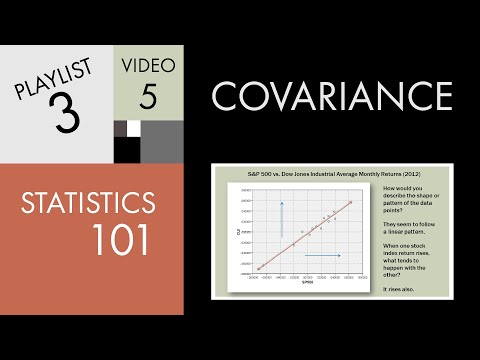

In [12]:
from IPython.display import YouTubeVideo
# 共分散の説明（英語）
YouTubeVideo('xGbpuFNR1ME')

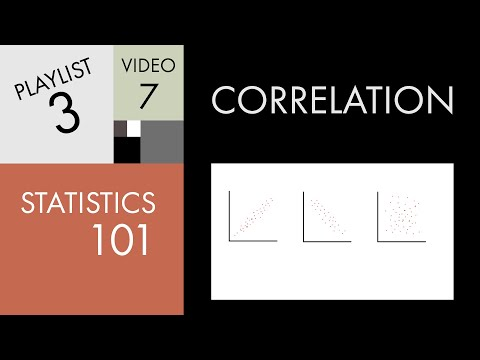

In [13]:
# 相関の説明（英語）
YouTubeVideo('4EXNedimDMs')

pandas.io.dataがなくなってしまいました。まず、pandas_datareaderをインストールします。以下のコマンドをOSのシェルから実行します。

pip install pandas_datareader

!pip install pandas_datareader　とすれば、ノートブック内から実行できます。

以下のコードを試してみてください。ただし、株価のAPIは頻繁に変更されるので、うまく行かないかもしれません。その場合は、Q&Aでお問い合わせください。

In [18]:
# 株価のデータを使って、共分散と相関をみていきましょう。
# PandasはWebからデータをとってくることも可能です。
#import pandas.io.data as pdweb
# 日付を扱うために、datetimeをimportします。
#import datetime
# 米国のYahooのサービスを使って、株価を取得します。
# すべて石油関連会社
# CVX シェブロン、XOM エクソンモービル、BP 英BP
#prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
#                               start=datetime.datetime(2010, 1, 1), 
#                               end=datetime.datetime(2013, 1, 1))['Adj Close']
#prices.head()

import pandas_datareader as pdr
import datetime
prices = pdr.get_data_yahoo(['CVX','XOM','BP'], 
                            start=datetime.datetime(2010, 1, 1), 
                            end=datetime.datetime(2013, 1, 1))['Adj Close']
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,51.658585,47.732052,33.005699
2010-01-04,53.047504,48.404034,33.677555
2010-01-05,53.423271,48.593029,33.916672
2010-01-06,53.429985,49.013016,34.093182
2010-01-07,53.228680,48.859024,34.081791


In [19]:
# 出来高（何株売買されたか）のデータも取れます
#@ pandas_datareaderを使います。
#volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
#                               start=datetime.datetime(2010, 1, 1), 
#                               end=datetime.datetime(2013, 1, 1))['Volume']
volume = pdr.get_data_yahoo(['CVX','XOM','BP'], 
                            start=datetime.datetime(2010, 1, 1), 
                            end=datetime.datetime(2013, 1, 1))['Volume']

volume.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,4246600.0,18852300.0,1517600.0
2010-01-04,10173800.0,27809100.0,3956100.0
2010-01-05,10593700.0,30174700.0,4109600.0
2010-01-06,11014600.0,35044700.0,6227900.0
2010-01-07,9626900.0,27192100.0,4431300.0


In [20]:
# 変化の割合を計算できます。
rets = prices.pct_change()

In [21]:
rets.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,0.026887,0.014078,0.020356
2010-01-05,0.007084,0.003905,0.007100
2010-01-06,0.000126,0.008643,0.005204
2010-01-07,-0.003768,-0.003142,-0.000334


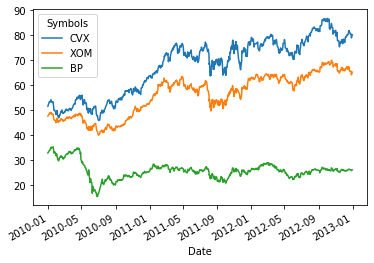

In [22]:
# まず、単純な株価の変化を描画してみます。
%matplotlib inline
prices.plot()

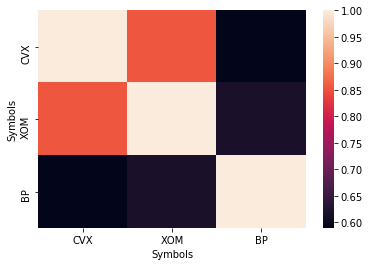

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# 予想通りの相関が見られます。
sns.heatmap(rets.corr())
# seabornについては、後ほど詳しく学習します。

In [24]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [25]:
#  重複するデータをまとめられます。
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [26]:
# それぞれのデータがいくつあるかもわかります。
ser1.value_counts()

w    4
x    3
y    2
z    2
a    1
dtype: int64